Installing all the Libraries and Packages needed

In [ ]:
!pip install geopandas
!pip install rioxarray
!pip install folium
!pip install opencv-contrib-python

Importing all the Libraries installed above

In [14]:
import numpy as np
import geopandas as gpd
import rioxarray
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import folium
from sklearn.metrics import cohen_kappa_score
from google.colab import drive
import cv2

Mounting my Google Drive where Data was uploaded to

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


Read the *Melusi* area file to get the Boundaries

In [4]:
melusi_area = gpd.read_file('/content/drive/MyDrive/HonsProj-Data/GTI_Data_Delivery20210902/SHP/Melusi_Area.shp')

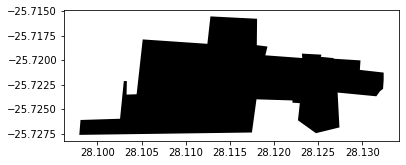

In [5]:
melusi_area.plot(color="black")

In [6]:
melusi_area.total_bounds

array([ 28.09795264, -25.72762111,  28.13242493, -25.71553163])

In [12]:
xmin, ymin, xmax, ymax = melusi_area.total_bounds

Create first interactive map of the *Melusi* Area

In [8]:
map1 = folium.Map(location=[-25.72,28.11], tiles='OpenStreetMap', zoom_start=15)

Add the *Melusi* Area to the first map

In [9]:
for _, r in melusi_area.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'blue'})
    geo_j.add_to(map1)

Display the first map by asking for the object representation

In [ ]:
map1

Save the first interactive map

In [11]:
map1.save('melusi_area.html')

Create second interactive map of the *Melusi* Area

In [19]:
map2 = folium.Map(location=[-25.72,28.11], tiles='Carto DB Positron', zoom_start=15)

Add the *Melusi* Area to the second map

In [20]:
for _, r in melusi_area.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'blue'})
    geo_j.add_to(map2)

Display the second map by asking for the object representation

In [ ]:
map2

Save the second interactive map

In [22]:
map2.save('melusi_area2.html')

Read the other data files

In [23]:
melusi_area_2010 = gpd.read_file('/content/drive/MyDrive/HonsProj-Data/GTI_Data_Delivery20210902/SHP/Melusi_Building_Based_Land_Use_Points_2010.shp')
melusi_area_2020 = gpd.read_file('/content/drive/MyDrive/HonsProj-Data/GTI_Data_Delivery20210902/SHP/Melusi_Building_Based_Land_Use_Points_2020.shp')
roads = gpd.read_file('/content/drive/MyDrive/HonsProj-Data/roads_lines_shp/hotosm_zaf_roads_lines.shp')
population = rioxarray.open_rasterio("/content/drive/MyDrive/HonsProj-Data/population_zaf_2019-07-01_geotiff/population_zaf_2019-07-01.tif")

Limit the Roads and Population data to just the *Melusi* Area

In [24]:
roads = roads.cx[xmin:xmax, ymin:ymax]
population = population.rio.clip_box(minx=xmin, miny=ymin, maxx=xmax, maxy=ymax)

Plot the new data files

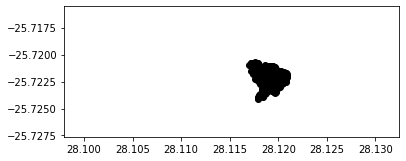

In [27]:
ax = melusi_area_2010.plot(color="black")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.autoscale_view(scalex=False, scaley=False)
ax.autoscale(enable=False)

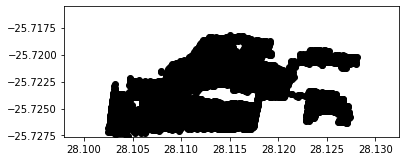

In [28]:
ax = melusi_area_2020.plot(color="black")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.autoscale_view(scalex=False, scaley=False)
ax.autoscale(enable=False)

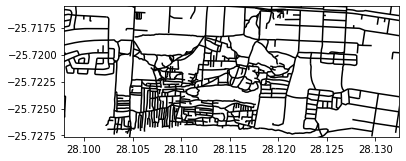

In [29]:
ax = roads.plot(color="black")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.autoscale_view(scalex=False, scaley=False)
ax.autoscale(enable=False)

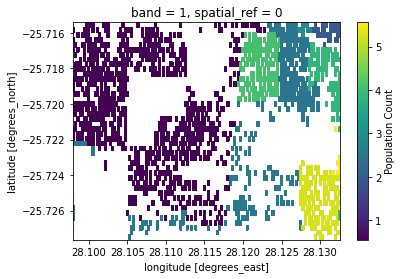

In [32]:
ax = population.plot()

Get the Coordinate Reference System for all the data

In [33]:
melusi_area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
melusi_area_2010.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
melusi_area_2020.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
type(population.values)

numpy.ndarray

In [ ]:
melusi_area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
print(f'CRS: {population.rio.crs}')
print(f'Bounds: {population.rio.bounds()}')
print(f'Width: {population.rio.width}')
print(f'Height: {population.rio.height}')

CRS: EPSG:4326
Bounds: (28.09791666667597, -25.727638888891768, 28.132638888898217, -25.71541666666954)
Width: 125
Height: 44


Save the Plotted Images without the Axes

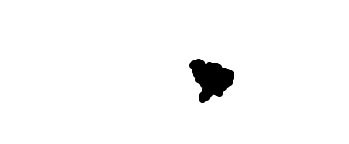

In [51]:
ax = melusi_area_2010.plot(color="black")
ax.set_axis_off()
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.autoscale_view(scalex=False, scaley=False)
ax.autoscale(enable=False)
plt.savefig("melusi-area2010-noaxis.png",dpi=1200)

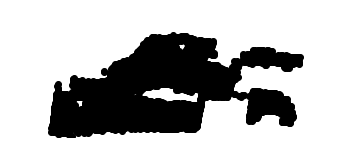

In [52]:
ax = melusi_area_2020.plot(color="black")
ax.set_axis_off()
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.autoscale_view(scalex=False, scaley=False)
ax.autoscale(enable=False)
plt.savefig("melusi-area2020-noaxis.png",dpi=1200)

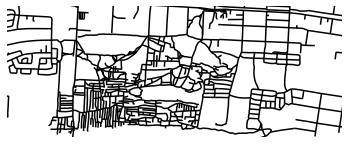

In [53]:
ax = roads.plot(color="black")
ax.set_axis_off()
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.autoscale_view(scalex=False, scaley=False)
ax.autoscale(enable=False)
plt.savefig("roads-noaxis.png",dpi=1200)

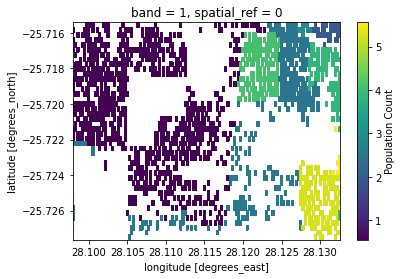

In [43]:
ax = population.plot()
plt.savefig("population-noaxis.png",dpi=1200)

Grayscale Images that were saved and resave

In [54]:
image = cv2.imread('melusi-area2010-noaxis.png')
melusi2010_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('melusi-area2010_gray.png', melusi2010_gray)

True

In [55]:
image = cv2.imread('melusi-area2020-noaxis.png')
melusi2020_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('melusi-area2020_gray.png', melusi2020_gray)

True

In [56]:
image = cv2.imread('roads-noaxis.png')
roads2019gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('roads2019_gray.png', roads2019gray)

True

Resize and scale new grayscale images

In [57]:
scale_percent = 33.333333333 # percent of original size

In [58]:
roads_gray = cv2.imread('roads2019_gray.png')
roads_gray = cv2.cvtColor(roads_gray, cv2.COLOR_BGR2GRAY)
width = int(roads_gray.shape[1] * scale_percent / 100)
height = int(roads_gray.shape[0] * scale_percent / 100)
dim = (width, height)
roads_gray_resized = cv2.resize(roads_gray, dim, interpolation = cv2.INTER_AREA)
cv2.imwrite('roads_gray_resized.png', roads_gray_resized)

True

In [59]:
melusi2010_gray = cv2.imread('melusi-area2010_gray.png')
melusi2010_gray = cv2.cvtColor(melusi2010_gray, cv2.COLOR_BGR2GRAY)
width = int(melusi2010_gray.shape[1] * scale_percent / 100)
height = int(melusi2010_gray.shape[0] * scale_percent / 100)
dim = (width, height)
melusi2010_gray_resized = cv2.resize(melusi2010_gray, dim, interpolation = cv2.INTER_AREA)
cv2.imwrite('melusi2010_gray_resized.png', melusi2010_gray_resized)

True

In [60]:
melusi2020_gray = cv2.imread('melusi-area2010_gray.png')
melusi2020_gray = cv2.cvtColor(melusi2020_gray, cv2.COLOR_BGR2GRAY)
width = int(melusi2020_gray.shape[1] * scale_percent / 100)
height = int(melusi2020_gray.shape[0] * scale_percent / 100)
dim = (width, height)
melusi2020_gray_resized = cv2.resize(melusi2020_gray, dim, interpolation = cv2.INTER_AREA)
cv2.imwrite('melusi2020_gray_resized.png', melusi2020_gray_resized)

True

Replace colors in roads with just black and white

In [61]:
def thresholdReplaceRoads(x):
  if x > 230:
    return 255
  elif x < 230 and x > 0:
    return 0
  else:
    return 0

In [62]:
vectorizeRoadsFunction = np.vectorize(thresholdReplaceRoads)
roads_gray_resized = vectorizeRoadsFunction(roads_gray_resized)

In [64]:
np.unique(roads_gray_resized)

array([  0, 255])

Replace colours in Grayscale Population Image with just 5 colours

In [66]:
def thresholdReplacePopulation(x):
  if x < 220 and x > 195: # Yellows in original picture
    return 215
  elif x > 25 and x < 35: # Purples in original picture
    return 30
  elif x > 80 and x < 115: # Blues in original picture
    return 99
  elif x > 130 and x < 150: # Greens in original picture
    return 146
  else: # To replace background colors
    return 255

In [68]:
population_gray_resized = cv2.imread('/content/drive/MyDrive/HonsArtifact/Pictures/2019population.png')
population_gray_resized = cv2.cvtColor(population_gray_resized, cv2.COLOR_BGR2GRAY)
vectorizePopulationFunction = np.vectorize(thresholdReplacePopulation)
population_gray_resized = vectorizePopulationFunction(population_gray_resized)
cv2.imwrite('population_new.png',population_gray_resized)

True

Methods to be utilised for Cellular Automata Modelling

In [70]:
# Replacing the grayscale colours with Population Density
def replaceWithPopulationDensity(x):
  if x == 30: # Purples in original picture
    return 0.5483527804562259
  elif x == 99: # Blues in original picture
    return 2.5802248275941975
  elif x == 146: # Greens in original picture
    return 4.0719211311237515
  elif x == 215: # Yellows in original picture
    return 5.236094447939968
  else: #To replace background colors
    return 0.1

In [71]:
vectorizePopulationFunction = np.vectorize(replaceWithPopulationDensity)

In [72]:
# If Road is present in pixel replace with 1
def replaceRoadsForCalc(x):
  if x == 255:
    return 0
  else:
    return 1

In [73]:
vectorizeRoadsFunction = np.vectorize(replaceRoadsForCalc)

In [75]:
# Replace Black and White pixels with 1s and 0s for Calculations
def replaceBWForCalculations(x):
  if x == 255:
    return 0
  else:
    return 1

In [76]:
vectorizeBWFunction = np.vectorize(replaceBWForCalculations)

Read and Grayscale Final Images for CA Modelling

In [77]:
melusi2010 = cv2.imread('/content/drive/MyDrive/HonsArtifact/Pictures/melusi2010gray01s_new.png')
melusi2020 = cv2.imread('/content/drive/MyDrive/HonsArtifact/Pictures/melusi2020gray01s_new.png')
population = cv2.imread('/content/drive/MyDrive/HonsArtifact/Pictures/population2019gray01s_new.png')
roads = cv2.imread('/content/drive/MyDrive/HonsArtifact/Pictures/roads_gray_01s_new.png')

In [78]:
melusi2010 = cv2.cvtColor(melusi2010, cv2.COLOR_BGR2GRAY)
melusi2020 = cv2.cvtColor(melusi2020, cv2.COLOR_BGR2GRAY)
population = cv2.cvtColor(population, cv2.COLOR_BGR2GRAY)
roads = cv2.cvtColor(roads, cv2.COLOR_BGR2GRAY)

Vectorize and replace Roads and Population data for Calculations

In [79]:
roads = vectorizeRoadsFunction(roads)
population = vectorizePopulationFunction(population)

Create copies of original data (so original remains unchanged)

In [80]:
melusi2010_copy = melusi2010.copy()
melusi2020_copy = melusi2020.copy()
population_copy = population.copy()
roads_copy = roads.copy()

Calculate Cumulative Sum Averages for Population and Roads

In [81]:
# Every 10 by 10 pixel block is calculated
row = 0
column = 0
step = 10 
doubleStep = 20
maxHeight = 830
maxWidth = 2160

firstRow = 0
secondRow = 10
secondLastRow = 810
lastRow = 820


firstColumn = 0
secondColumn = 10
secondLastColumn = 2140
lastColumn = 2150

cumsumPopulationList = []
cumsumRoadList = []

for row in range(0,len(melusi2010_copy),10):
    for column in range(0,len(melusi2010_copy[row]),10):

      if(row < maxHeight and column < maxWidth):
        populationBlock = population_copy[row:row+step,column:column+step]
        roadsBlock = roads_copy[row:row+step,column:column+step]
        roadsCumulativeCalc = np.cumsum(roadsBlock)[-1]/100
        populationCumulativeCalc = np.cumsum(populationBlock)[-1]/100
        cumsumPopulationList.append(populationCumulativeCalc)
        cumsumRoadList.append(roadsCumulativeCalc)

Create Graph for Population Cumulative Sum Averages

In [82]:
npArrayPopulation = np.array(cumsumPopulationList)
binsPopulation = np.unique(npArrayPopulation)
graphPopulation = np.histogram(npArrayPopulation, bins=binsPopulation)
xPopulation = list(graphPopulation[1][:-1])
yPopulation = list(graphPopulation[0])

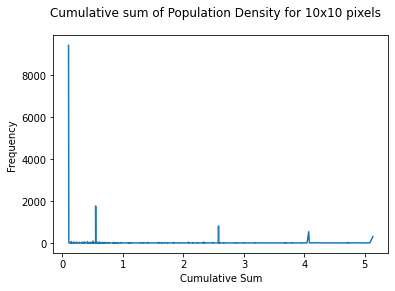

In [84]:
populationFigure = plt.figure()
plt.plot(xPopulation,yPopulation)
populationFigure.suptitle("Cumulative sum of Population Density for 10x10 pixels")
plt.xlabel('Cumulative Sum')
plt.ylabel('Frequency')
populationFigure.savefig('populationFigure.jpg')

Create Graph for Cumulative Sums Averages for Roads

In [85]:
npArrayRoads = np.array(cumsumRoadList)
binsRoads = np.unique(npArrayRoads)
graphRoads = np.histogram(npArrayRoads, bins=binsRoads)
xRoads = list(graphRoads[1][:-1])
yRoads = list(graphRoads[0])

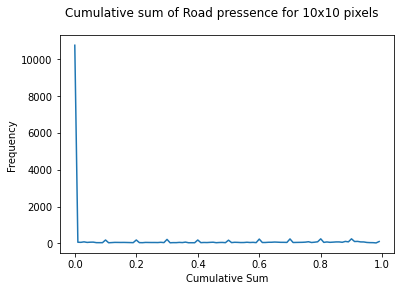

In [86]:
roadsFigure = plt.figure()
plt.plot(xRoads,yRoads)
roadsFigure.suptitle("Cumulative sum of Road pressence for 10x10 pixels")
plt.xlabel('Cumulative Sum')
plt.ylabel('Frequency')
roadsFigure.savefig('roadsFigure.jpg')

Cellular Automata Model

In [87]:
# Create Variables for the model

row = 0
column = 0
step = 10
doubleStep = 20
maxHeight = 830
maxWidth = 2160

firstRow = 0
secondRow = 10
secondLastRow = 810
lastRow = 820


firstColumn = 0
secondColumn = 10
secondLastColumn = 2140
lastColumn = 2150

# Start Model with 0 for each rule tested
roadsConditional = 0
populationConditional = 0
topBottomConditional = 0
diagonalConditional = 0

# Create a Temporary Copy of the Initial State 
tempMelusi = melusi2010.copy()

# Create Flat array for Accuracy Testing
accuracyBenchmark = melusi2020_copy.flatten()
accuracyList = []

# Run Model for 50 Generations
for generations in range(1,51):
  # Go through entire 10 by 10 pixels in the Array
  for row in range(0,len(melusi2010_copy),step):
    for column in range(0,len(melusi2010_copy[row]),step):
      #Blocks for cellular automata
      TopMiddle = None
      BottomMiddle = None
      MiddleRight = None
      MiddleLeft = None
      TopLeft = None
      TopRight = None
      BottomLeft = None
      BottomRight = None

      # Cumulative Sums for Blocks created above
      sumTopMiddle = 0
      sumBottomMiddle = 0
      sumMiddleRight = 0
      sumMiddleLeft = 0
      sumTopLeft = 0
      sumTopRight = 0
      sumBottomLeft = 0
      sumBottomRight = 0
      # Averages for Cumulative Sums Blocks created above
      averageOfSumsTopsBottoms = 0
      averageOfSumsDiagonals = 0

      if(row < maxHeight and column < maxWidth):
        populationBlock = population_copy[row:row+step,column:column+step]
        roadsBlock = roads_copy[row:row+step,column:column+step]
        roadsCumulativeCalc = np.cumsum(roadsBlock)[-1]/100
        populationCumulativeCalc = np.cumsum(populationBlock)[-1]/100
        
        # Check if Top Middle Block exists
        if (row >= secondRow and row <= lastRow and column >= firstColumn and column <= lastColumn):
          TopMiddle = melusi2010_copy[row-step:row, column:column+step]
          TopMiddle = vectorizeBWFunction(TopMiddle)
          sumTopMiddle = np.cumsum(TopMiddle)[-1]/100
        
        # Check if Bottom Middle Block exists
        if (row >= firstRow and row <= secondLastRow and column >= firstColumn and column <= lastColumn):
          BottomMiddle = melusi2010_copy[row:row+step, column:column+step]
          BottomMiddle = vectorizeBWFunction(BottomMiddle)
          sumBottomMiddle = np.cumsum(BottomMiddle)[-1]/100

        # Check if Middle Right Block exists
        if (row >= firstRow and row <= lastRow and column >= firstColumn and column <= secondLastColumn):
          MiddleRight = melusi2010_copy[row:row+step, column+step:column+doubleStep]
          MiddleRight = vectorizeBWFunction(MiddleRight)
          sumMiddleRight = np.cumsum(MiddleRight)[-1]/100

        # Check if Middle Left Block exists
        if (row >= firstRow and row <= lastRow and column >= secondColumn and column <= lastColumn):
          MiddleLeft = melusi2010_copy[row:row+step, column-step:column]
          MiddleLeft = vectorizeBWFunction(MiddleLeft)
          sumMiddleLeft = np.cumsum(MiddleLeft)[-1]/100

        # Check if Top Left Block exists
        if (row >= secondRow and row <= lastRow and column >= secondColumn and column <= lastColumn):
          TopLeft = melusi2010_copy[row-step:row, column-step:column]
          TopLeft = vectorizeBWFunction(TopLeft)
          sumTopLeft = np.cumsum(TopLeft)[-1]/100

        # Check if Top Right Block exists
        if (row >= secondRow and row <= lastRow and column >= firstColumn and column <= secondLastColumn):
          TopRight = melusi2010_copy[row-step:row, column+step:column+doubleStep]
          TopRight = vectorizeBWFunction(TopRight)
          sumTopRight = np.cumsum(TopRight)[-1]/100

        # Check if Bottom Left Block exists
        if (row >= firstRow and row < secondLastRow and column >= secondColumn and column <= lastColumn):
          BottomLeft = melusi2010_copy[row+step:row+doubleStep, column-step:column]
          BottomLeft = vectorizeBWFunction(BottomLeft)
          sumBottomLeft = np.cumsum(BottomLeft)[-1]/100

        # Check if Bottom Right Block exists
        if (row >= firstRow and row <= secondLastRow and column >= firstColumn and column <= secondLastColumn):
          BottomRight = melusi2010_copy[row+step:row+doubleStep, column+step:column+doubleStep]
          BottomRight = vectorizeBWFunction(BottomRight)
          sumBottomRight = np.cumsum(BottomRight)[-1]/100

        # Add Top and Bottom Blocks to a list
        countTopsBottoms = [TopMiddle, BottomMiddle, MiddleRight, MiddleLeft] 
        # Add Diagonal Blocks to a list
        countDiags = [TopLeft, TopRight, BottomLeft, BottomRight]

        # Count how many Neighbour Blocks there are for Current Block
        noneCountsTops = len([x for x in countTopsBottoms if x is not None])
        noneCountsDiag = len([x for x in countDiags if x is not None])

        # Get Averages of Top and Bottom Blocks Cumulative Sums
        averageOfSumsTopsBottoms = (sumTopMiddle + sumBottomMiddle + sumMiddleRight + sumMiddleLeft) / noneCountsTops
        # Get Averages of Diagonals Blocks Cumulative Sums
        averageOfSumsDiagonals = (sumTopLeft + sumTopRight + sumBottomLeft + sumBottomRight) / noneCountsDiag
        
        # First Generation
        if (generations == 1):
            roadsConditional = 0.01
            populationConditional = 0.08
            diagonalsCondidtional = 0.1
            topBottomConditional = 0.1
            # First Generation Rules are Checked
            if ((roadsCumulativeCalc >= roadsConditional or populationCumulativeCalc >= populationConditional) and (averageOfSumsDiagonals > diagonalsCondidtional or averageOfSumsTopsBottoms > topBottomConditional)):
              # Fill Current Block as Alive
              for m in range(row,row+step):
                for n in range(column,column+step):
                  tempMelusi[m,n] = 0
        # Second Generation
        elif (generations == 2):
            roadsConditional = 0.01
            populationConditional = 0.08
            diagonalsCondidtional = 0.1
            topBottomConditional = 0.1
            # Second Generation Rules are Checked
            if ((roadsCumulativeCalc >= roadsConditional and populationCumulativeCalc >= populationConditional) and (averageOfSumsDiagonals > diagonalsCondidtional or averageOfSumsTopsBottoms > topBottomConditional)):
              # Fill Current Block as Alive
              for m in range(row,row+step):
                for n in range(column,column+step):
                  tempMelusi[m,n] = 0
        # Generations less than 40
        elif (generations < 40):
            roadsConditional = 0.1
            populationConditional = 0.1
            diagonalsCondidtional = 0.1
            topBottomConditional = 0.1
            # Generations less than 40 Rules are Checked
            if ((roadsCumulativeCalc >= roadsConditional and populationCumulativeCalc >= populationConditional) and (averageOfSumsDiagonals > diagonalsCondidtional or averageOfSumsTopsBottoms > topBottomConditional)):
              # Fill Current Block as Alive
              for m in range(row,row+step):
                for n in range(column,column+step):
                  tempMelusi[m,n] = 0
        # Generations more than 40 and less than 51
        else:
            roadsConditional = 0.09
            populationConditional = 0.05
            diagonalsCondidtional = 0.15
            topBottomConditional = 0.1
            # Generations(40 < x < 50) Rules are Checked
            if ((roadsCumulativeCalc >= roadsConditional and populationCumulativeCalc >= populationConditional) and (averageOfSumsDiagonals > diagonalsCondidtional or averageOfSumsTopsBottoms > topBottomConditional)):
              # Fill Current Block as Alive
              for m in range(row,row+step):
                for n in range(column,column+step):
                  tempMelusi[m,n] = 0
  # Copy temporary array to final array
  melusi2010_copy = tempMelusi
  # Calculate Accuracy
  accuracyTemp = melusi2010_copy.copy().flatten()
  score = cohen_kappa_score(accuracyBenchmark,accuracyTemp)
  accuracyList.append(score)
  # Write Current Simulated Generation to an image
  filename = f"pics/generation-{str(generations)}-melusi.png"
  cv2.imwrite(filename,melusi2010_copy)

Create Graph for Accuracy results

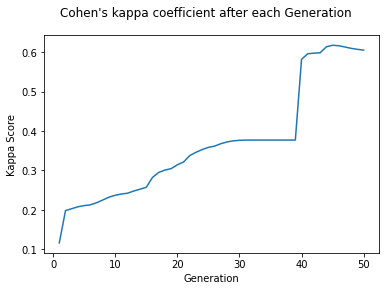

In [88]:
generationsList = list(map(lambda x: x, range(1,51)))
scoresFigure = plt.figure()
plt.plot(generationsList,accuracyList)
scoresFigure.suptitle("Cohen's kappa coefficient after each Generation")
plt.xlabel('Generation')
plt.ylabel('Kappa Score')
scoresFigure.savefig('scoresFigure.jpg')

Get Maximum Accuracy achieved

In [89]:
max(accuracyList)

0.6177552964145456

Get Accuracy for each generation

In [91]:
for i in range(1,51):
  print(f'Generation: {i}\t{accuracyList[i-1]}')

Generation: 1	0.11625181498059378
Generation: 2	0.19824922121107136
Generation: 3	0.2030628354462608
Generation: 4	0.20793481429046645
Generation: 5	0.21093437785824343
Generation: 6	0.21283046681369622
Generation: 7	0.21812986043325577
Generation: 8	0.22511088417746883
Generation: 9	0.23225494066337948
Generation: 10	0.23712807908806854
Generation: 11	0.24030784142599682
Generation: 12	0.24236259441785502
Generation: 13	0.24795555301338124
Generation: 14	0.25260419032659376
Generation: 15	0.2572418136274782
Generation: 16	0.2822792436920437
Generation: 17	0.29504157655474317
Generation: 18	0.30102906854032363
Generation: 19	0.304648848523116
Generation: 20	0.3143884842889031
Generation: 21	0.3215714223769961
Generation: 22	0.33780443805206917
Generation: 23	0.3461394892632711
Generation: 24	0.35302831352863406
Generation: 25	0.3586621586000974
Generation: 26	0.3618238888941685
Generation: 27	0.36795669505675166
Generation: 28	0.3723251828092663
Generation: 29	0.37529002091648256
Gener